# Pymaceuticals Inc.
---

### Analysis

A study was conducted on 249 mice with squamous cell carcinoma who were treated with one of 10 drug regimens for 45 days. The purpose of the study was to compare the performance of one of the drugs, Capomulin, against the others. An analysis of data collected from this study revealed the following:
- Given there were 249 mice and 10 drug regimens, only 24 or 25 mice were treated with each drug (24 for Stelasyn and Propriva, 25 for the other drugs). A larger sample size or fewer drug regimens would have been beneficial.
- Capomulin had the 2nd lowest average tumor volume (40.68 mm3), only slightly higher than Ramicane with 40.22 mm3. The average tumor volume for the other drugs ranged from 52.6 mm3 to 55.24 mm3. It would appear that Capomulin did outperform those drugs although again the small sample size could have impacted these results. In addition, it would be good to look at the average starting tumor volume for all of the mice in the study and analyze the change in tumor volume for each of the drug regimens.
- The number of observations for each drug regimen ranged from 148 to 230 even though 24-25 mice were treated with each drug. This raises the question of consistency in the study given there were more observations with some drugs than others. It also raises the question as to the consistency of treatment and if that could have affected the results.
- For mice treated with Capomulin, there is strong positive correlation (0.84) between the weight of the mice and their tumor volume. This means that mice with a lower tumor volume tended to have a lower weight. As stated earlier, this is based on only 25 mice and would benefit from a larger data set.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupes = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dupe_mouse_ids = dupes["Mouse ID"].unique()
dupe_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
dupes = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Reference: https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
for mouse in dupe_mouse_ids:
    duplicates_index = study_data[study_data["Mouse ID"] == mouse].index
    clean_data = study_data.drop(duplicates_index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_data.groupby(["Drug Regimen"])
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median =  drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
std = drug_regimen["Tumor Volume (mm3)"].std()
std_errors = drug_regimen["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,"Tumor Volume Std. Dev.": std,
                              "Tumor Volume Std. Err.": std_errors
                             })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Number of mice per drug regimen to ensure even distribution. Concern as to variation in Mouse ID/Timepoints
clean_data.groupby("Drug Regimen")["Mouse ID"].nunique()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

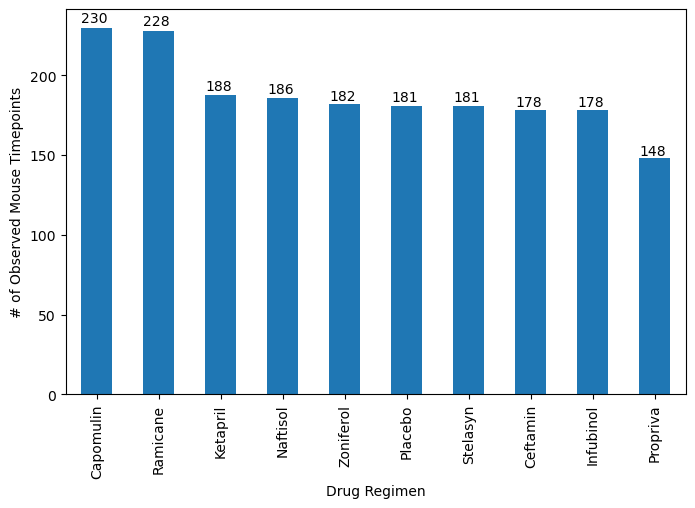

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_data[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen").count()
timepoints.sort_values(by="Timepoint", ascending=False, inplace=True)
fig = timepoints.plot(kind="bar", figsize=(8,5), ylabel="# of Observed Mouse Timepoints", legend=False)

# Reference: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
# Added values to chart for analysis
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.015))

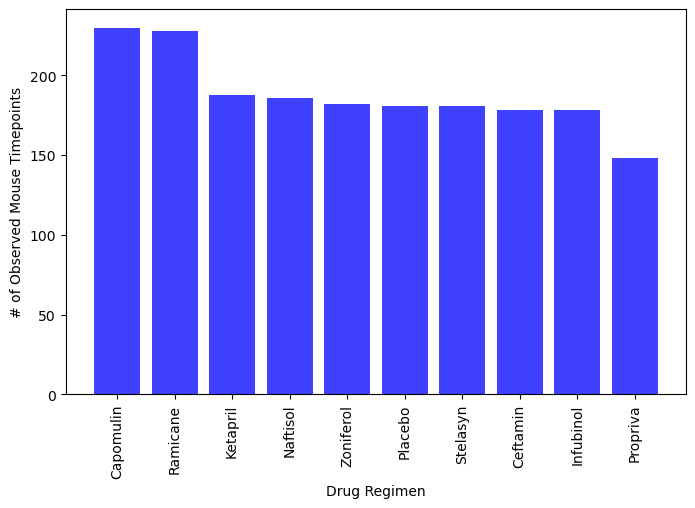

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(timepoints.size)
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, timepoints["Timepoint"], color="blue", alpha=.75, align="center")
plt.xticks(tick_locations, timepoints.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

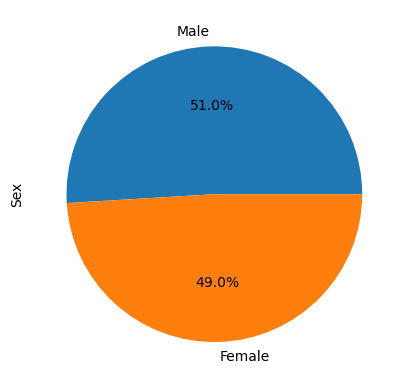

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data["Sex"].value_counts()
gender.plot(kind="pie", autopct="%1.1f%%")

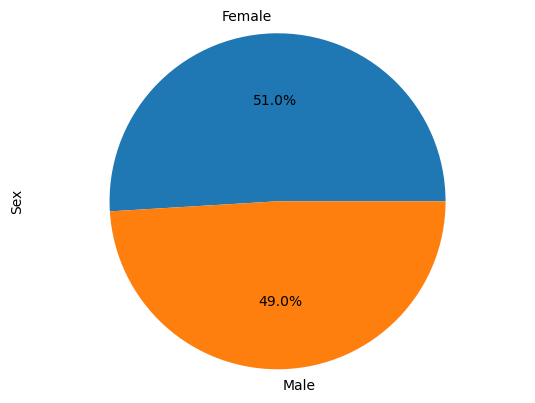

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data["Sex"].value_counts()
labels = clean_data["Sex"].unique()
plt.pie(gender, labels=labels, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
columns = ["Mouse ID", "Drug Regimen", "Timepoint"]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_data[columns].groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(max_timepoints, clean_data, how="left", on=columns).reset_index()

final_tumor_vol

,index,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,0,a203,Infubinol,45,67.973419,2,Female,20,23
1,1,a251,Infubinol,45,65.525743,1,Female,21,25
2,2,a262,Placebo,45,70.717621,4,Female,17,29
3,3,a275,Ceftamin,45,62.999356,3,Female,20,28
4,4,a366,Stelasyn,30,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,243,z435,Propriva,10,48.710661,0,Female,12,26
244,244,z578,Ramicane,45,30.638696,0,Male,11,16
245,245,z581,Infubinol,45,62.754451,3,Female,24,25
246,246,z795,Naftisol,45,65.741070,3,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [[] for _ in range(4)]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for reg in np.arange(0, len(regimens)):
    for x in np.arange(0, len(final_tumor_vol)):
        if final_tumor_vol.iloc[x, 2] == regimens[reg]:
            tumor_vol_data[reg].append(final_tumor_vol.iloc[x, 4])
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

    outliers = []
    
for reg in np.arange(0, len(regimens)):
    quartiles = pd.Series(tumor_vol_data[reg]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    upperb = upperq + 1.5 * iqr
    lowerb = lowerq - 1.5 * iqr
    for x in tumor_vol_data[reg]:
        if (x <= lowerb) or (x >= upperb):
            outliers.append(x)
    print(f"{regimens[reg]}'s potential outliers: {outliers}")
    print(f"upperb = {upperb}, lowerb = {lowerb}")
    outliers = []

Capomulin's potential outliers: []
upperb = 51.83201549, lowerb = 20.70456164999999
Ramicane's potential outliers: []
upperb = 54.30681135, lowerb = 17.912664470000003
Infubinol's potential outliers: [36.3213458]
upperb = 82.74144559000001, lowerb = 36.83290494999999
Ceftamin's potential outliers: []
upperb = 87.66645829999999, lowerb = 25.355449580000002


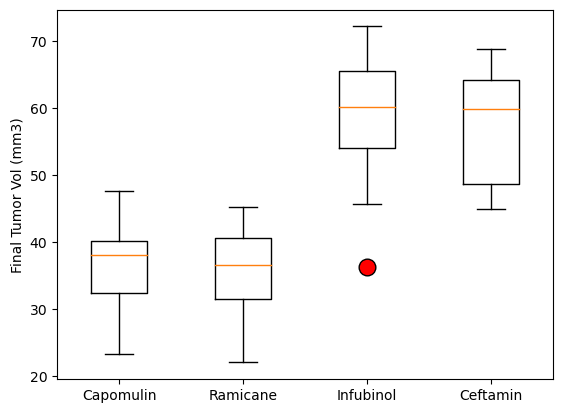

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
x_axis = np.arange(1, len(regimens)+1)
tick_locations = [value for value in x_axis]

fig1, ax1 = plt.subplots()
ax1.set_title("")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(tumor_vol_data, flierprops={"marker": "o", "markersize": 12, "markerfacecolor": "red"})
plt.xticks(tick_locations, regimens)
plt.show()

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse L509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

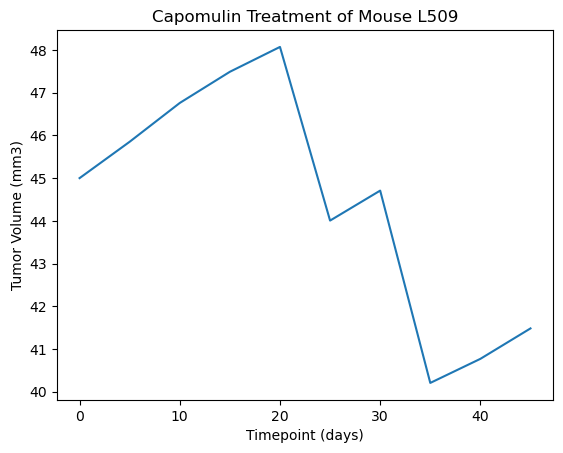

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]

mouse_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)",
                xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)",
                title="Capomulin Treatment of Mouse L509", legend=False)

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

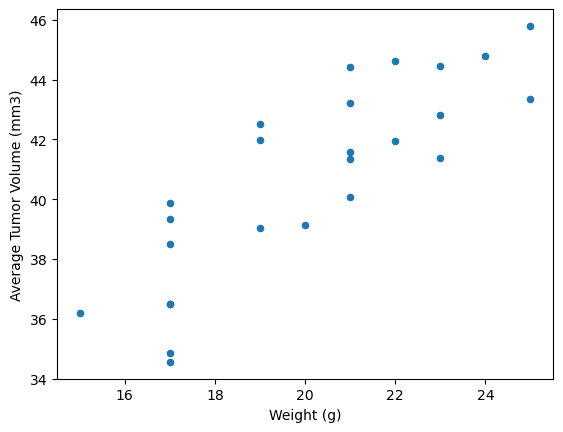

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"].groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().to_frame(name = "Average Tumor Volume (mm3)").reset_index()

scatter_data.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")

In [19]:
# Number of data points/mice
scatter_data["Mouse ID"].nunique()

25

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


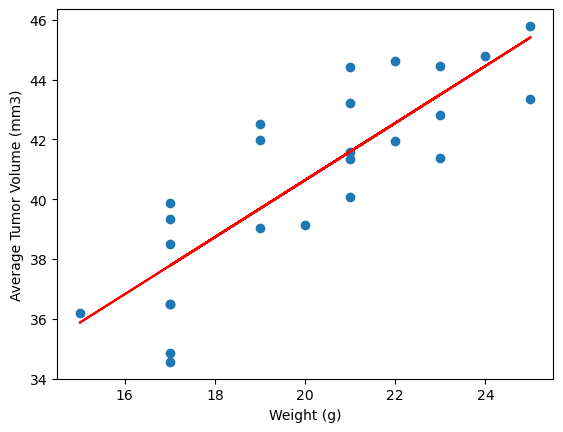

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Average Tumor Volume (mm3)"]

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()